In [1]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Total 703 (delta 0), reused 0 (delta 0), pack-reused 703
Receiving objects: 100% (703/703), 176.00 MiB | 28.61 MiB/s, done.
Resolving deltas: 100% (309/309), done.
Updating files: 100% (228/228), done.


In [6]:
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [7]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  4,  5,  1,  3,  9, 10,  2,  7]), tensor([0, 6]))

In [8]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [13]:
import torch.nn as nn

linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[-1.9618],
        [-1.9103]], grad_fn=<AddmmBackward0>)

In [14]:
linear_model.weight

Parameter containing:
tensor([[-0.2860]], requires_grad=True)

In [15]:
linear_model.bias

Parameter containing:
tensor([-0.9408], requires_grad=True)

In [17]:
x = torch.ones(1)
print(x)
linear_model(x)

tensor([1.])


tensor([-1.2268], grad_fn=<AddBackward0>)

In [19]:
x = torch.ones(10,1)
linear_model(x)

tensor([[-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268],
        [-1.2268]], grad_fn=<AddmmBackward0>)

In [21]:
import torch.optim as optim

linear_model = nn.Linear(1,1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)

In [22]:
linear_model.parameters()

<generator object Module.parameters at 0x7f4208ae6500>

In [23]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.8214]], requires_grad=True),
 Parameter containing:
 tensor([-0.5361], requires_grad=True)]

In [26]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    #squared_diffs = (t_p - t_c)**2
    #return squared_diffs.mean()
    return nn.MSELoss()
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [27]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}",
                f"Validation loss {loss_val.item():.4f}")

In [28]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

Epoch 1, Training loss 386.7316 Validation loss 26.0064
Epoch 1000, Training loss 4.2591 Validation loss 4.2754
Epoch 2000, Training loss 2.9427 Validation loss 3.0038
Epoch 3000, Training loss 2.8598 Validation loss 3.2916


In [29]:
print(linear_model.weight, linear_model.bias)

Parameter containing:
tensor([[5.4089]], requires_grad=True) Parameter containing:
tensor([-17.5977], requires_grad=True)


In [30]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [31]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [34]:
for name, param in seq_model.named_parameters():
    print(name, param.shape, param)

0.weight torch.Size([13, 1]) Parameter containing:
tensor([[ 0.4436],
        [-0.1475],
        [ 0.3636],
        [ 0.4158],
        [-0.3444],
        [-0.7210],
        [ 0.6439],
        [-0.2307],
        [ 0.8748],
        [ 0.8665],
        [-0.4712],
        [-0.9835],
        [-0.0782]], requires_grad=True)
0.bias torch.Size([13]) Parameter containing:
tensor([ 0.3492,  0.0920, -0.6072, -0.5179, -0.1654, -0.8945,  0.5929, -0.0189,
         0.6191, -0.9319,  0.7041,  0.8924,  0.0338], requires_grad=True)
2.weight torch.Size([1, 13]) Parameter containing:
tensor([[ 0.0871,  0.2260, -0.1840,  0.1838,  0.1977,  0.0711, -0.0749, -0.0553,
         -0.0994,  0.0377,  0.2004, -0.0157, -0.0755]], requires_grad=True)
2.bias torch.Size([1]) Parameter containing:
tensor([0.1249], requires_grad=True)


In [35]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [36]:
for name, param in seq_model.named_parameters():
    print(name, param.shape, param)

hidden_linear.weight torch.Size([8, 1]) Parameter containing:
tensor([[ 0.0470],
        [-0.2838],
        [ 0.3875],
        [ 0.0201],
        [-0.0639],
        [-0.9449],
        [-0.1697],
        [-0.6026]], requires_grad=True)
hidden_linear.bias torch.Size([8]) Parameter containing:
tensor([-0.5473, -0.1396, -0.2718, -0.2252, -0.8537,  0.4897, -0.0153,  0.5648],
       requires_grad=True)
output_linear.weight torch.Size([1, 8]) Parameter containing:
tensor([[ 0.1714,  0.0243,  0.3534, -0.2641, -0.2453, -0.1209, -0.1677,  0.1743]],
       requires_grad=True)
output_linear.bias torch.Size([1]) Parameter containing:
tensor([-0.0816], requires_grad=True)


In [37]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0816], requires_grad=True)

In [38]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 215.3323 Validation loss 3.3910
Epoch 1000, Training loss 14.2595 Validation loss 3.7090
Epoch 2000, Training loss 6.3208 Validation loss 3.1916
Epoch 3000, Training loss 2.9075 Validation loss 3.3153
Epoch 4000, Training loss 1.8640 Validation loss 3.4105
Epoch 5000, Training loss 1.6020 Validation loss 3.5863
output tensor([[1.0458],
        [0.3390]], grad_fn=<AddmmBackward0>)
answer tensor([[0.5000],
        [3.0000]])
hidden tensor([[ 2.9872],
        [-0.4214],
        [ 3.1410],
        [-0.3010],
        [-0.1081],
        [-2.4722],
        [-1.2660],
        [-2.9370]])


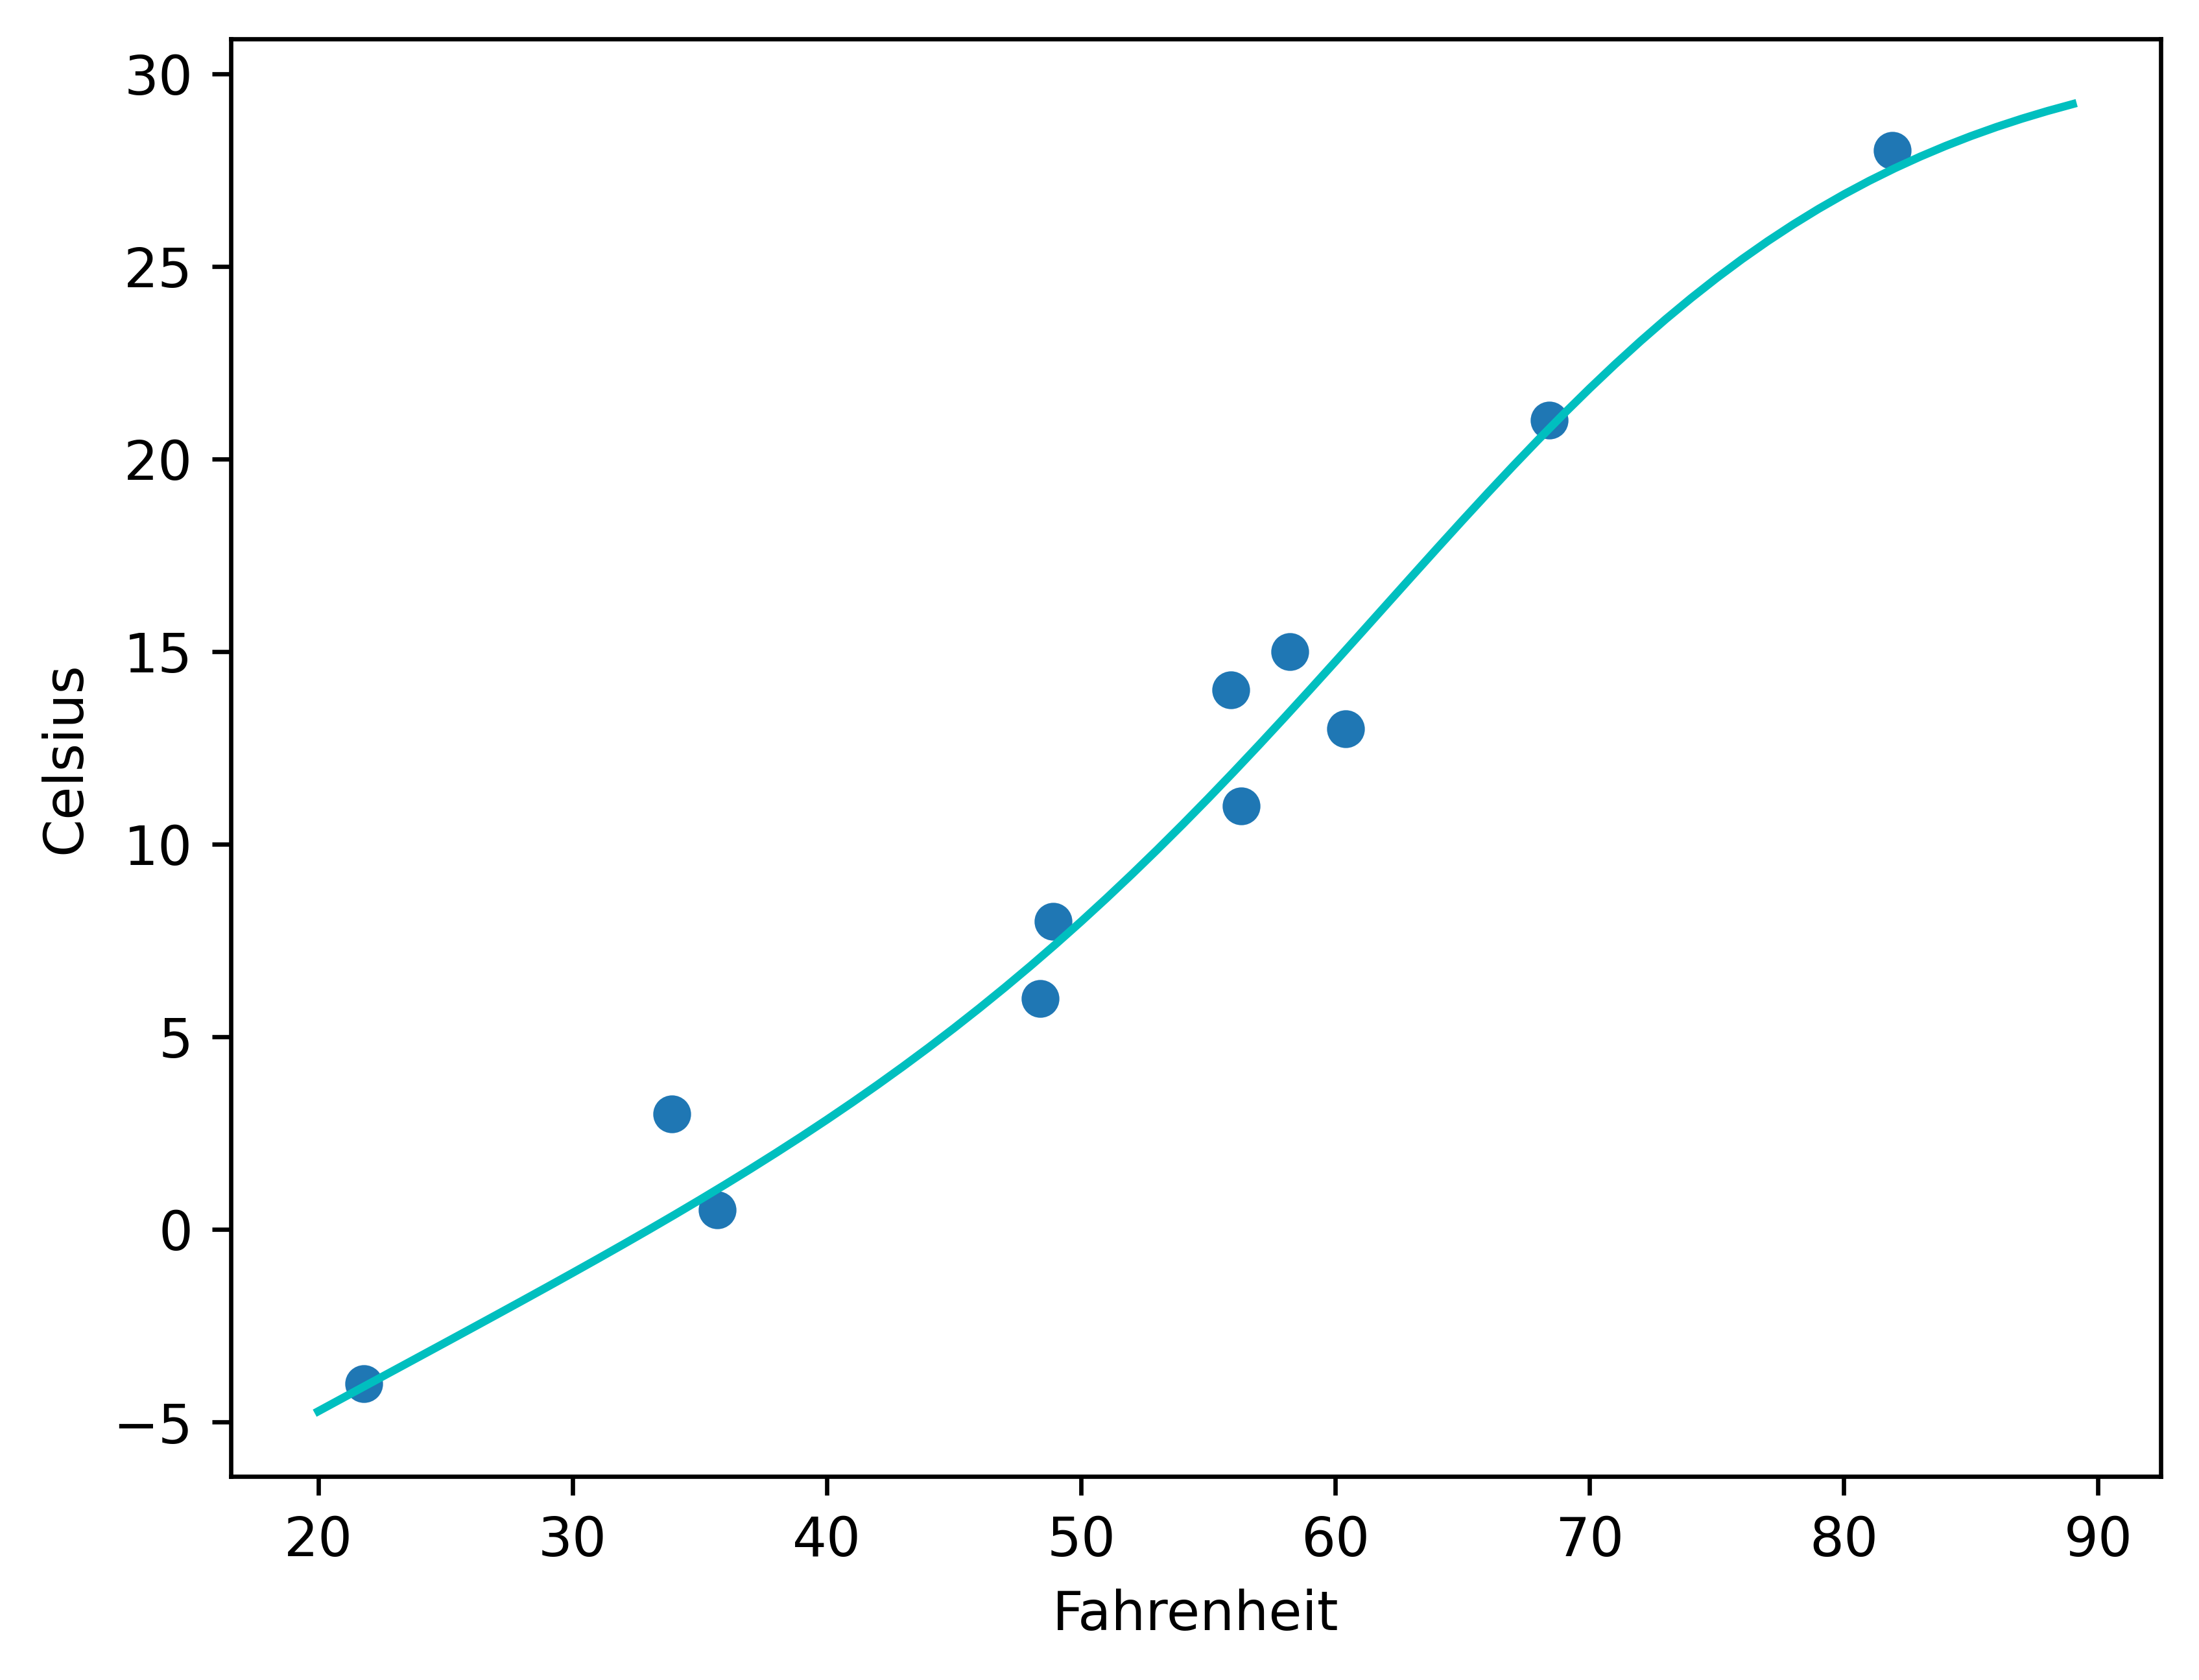

In [39]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')

In [40]:
import pandas as pd
import csv
wine_path = "/content/dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv"

wineq_pd = pd.read_csv(wine_path, sep=';')
wineq_numpy = wineq_pd.to_numpy()
col_list = list(wineq_pd.keys())
wineq = torch.from_numpy(wineq_numpy)

In [41]:
data = wineq[:,:-1]
target = wineq[:, -1].long()